# Principal Component Analysis with Cancer Data

In [115]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [116]:
df=pd.read_csv("breast-cancer-wisconsin-data.csv")

In [117]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [118]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values.
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [119]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [120]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [121]:
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [122]:
df[df['Bare Nuclei']=='?'].sum()

ID                                     13721250
ClumpThickness                               54
Cell Size                                    39
Cell Shape                                   46
Marginal Adhesion                            29
Single Epithelial Cell Size                  39
Bare Nuclei                    ????????????????
Normal Nucleoli                              50
Bland Chromatin                              44
Mitoses                                      16
Class                                        36
dtype: object

In [9]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [123]:
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

In [124]:
len(df[df['Bare Nuclei']=='?'])

16

In [18]:
df['Bare Nuclei'].mode()

0    1
dtype: object

In [14]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values.

In [20]:
df['Bare Nuclei'] = df['Bare Nuclei'].replace('?','1')

In [21]:
len(df[df['Bare Nuclei']=='?'])

0

In [22]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [24]:
#Conver type object into integer
df['Bare Nuclei']= df['Bare Nuclei'].astype('int64')

In [25]:
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [27]:
Dup_Rows = df[df.duplicated()]

In [28]:
Dup_Rows.shape

(9, 11)

In [29]:
#drop duplicat records/rows
df= df.drop_duplicates()

In [82]:
# Mo missing values.
# ? replaced with 1.
# Duplicates are removed.

In [30]:
df=df.drop('ID', axis=1)

In [31]:
df.shape

(690, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [26]:
# Check for correlation of variable

In [34]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [28]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin.
# Target variable shows high correlation with most of these variables except Mitoses.

In [36]:
#Let us check for pair plots.

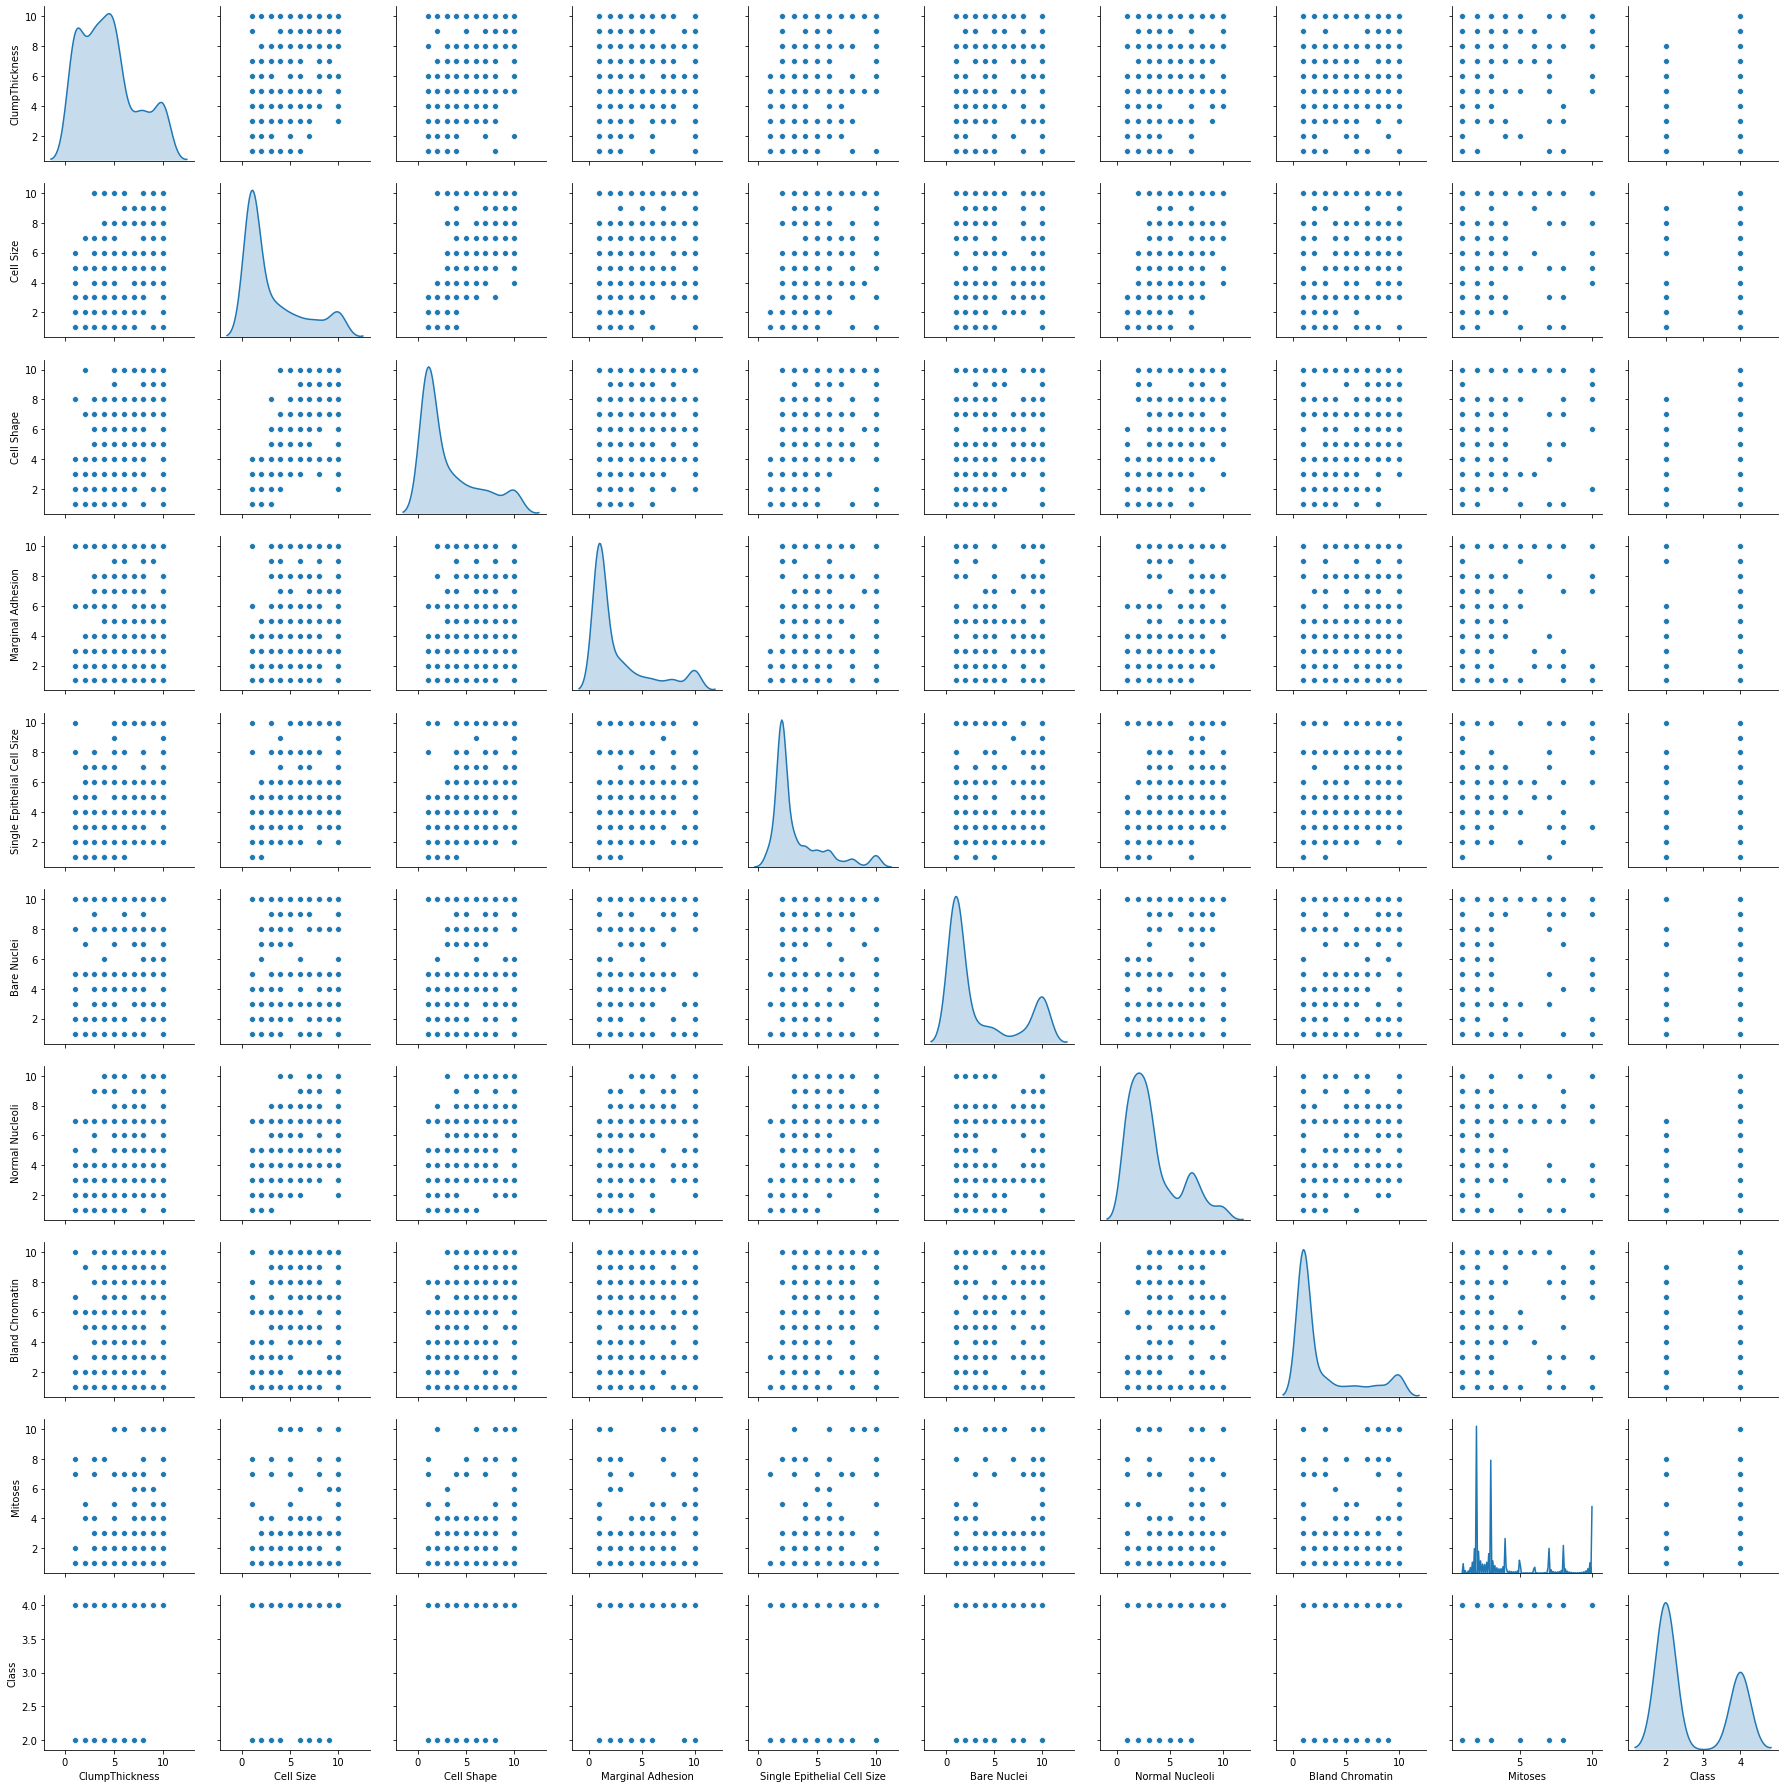

In [37]:
sns.pairplot(df, diag_kind='kde')

C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


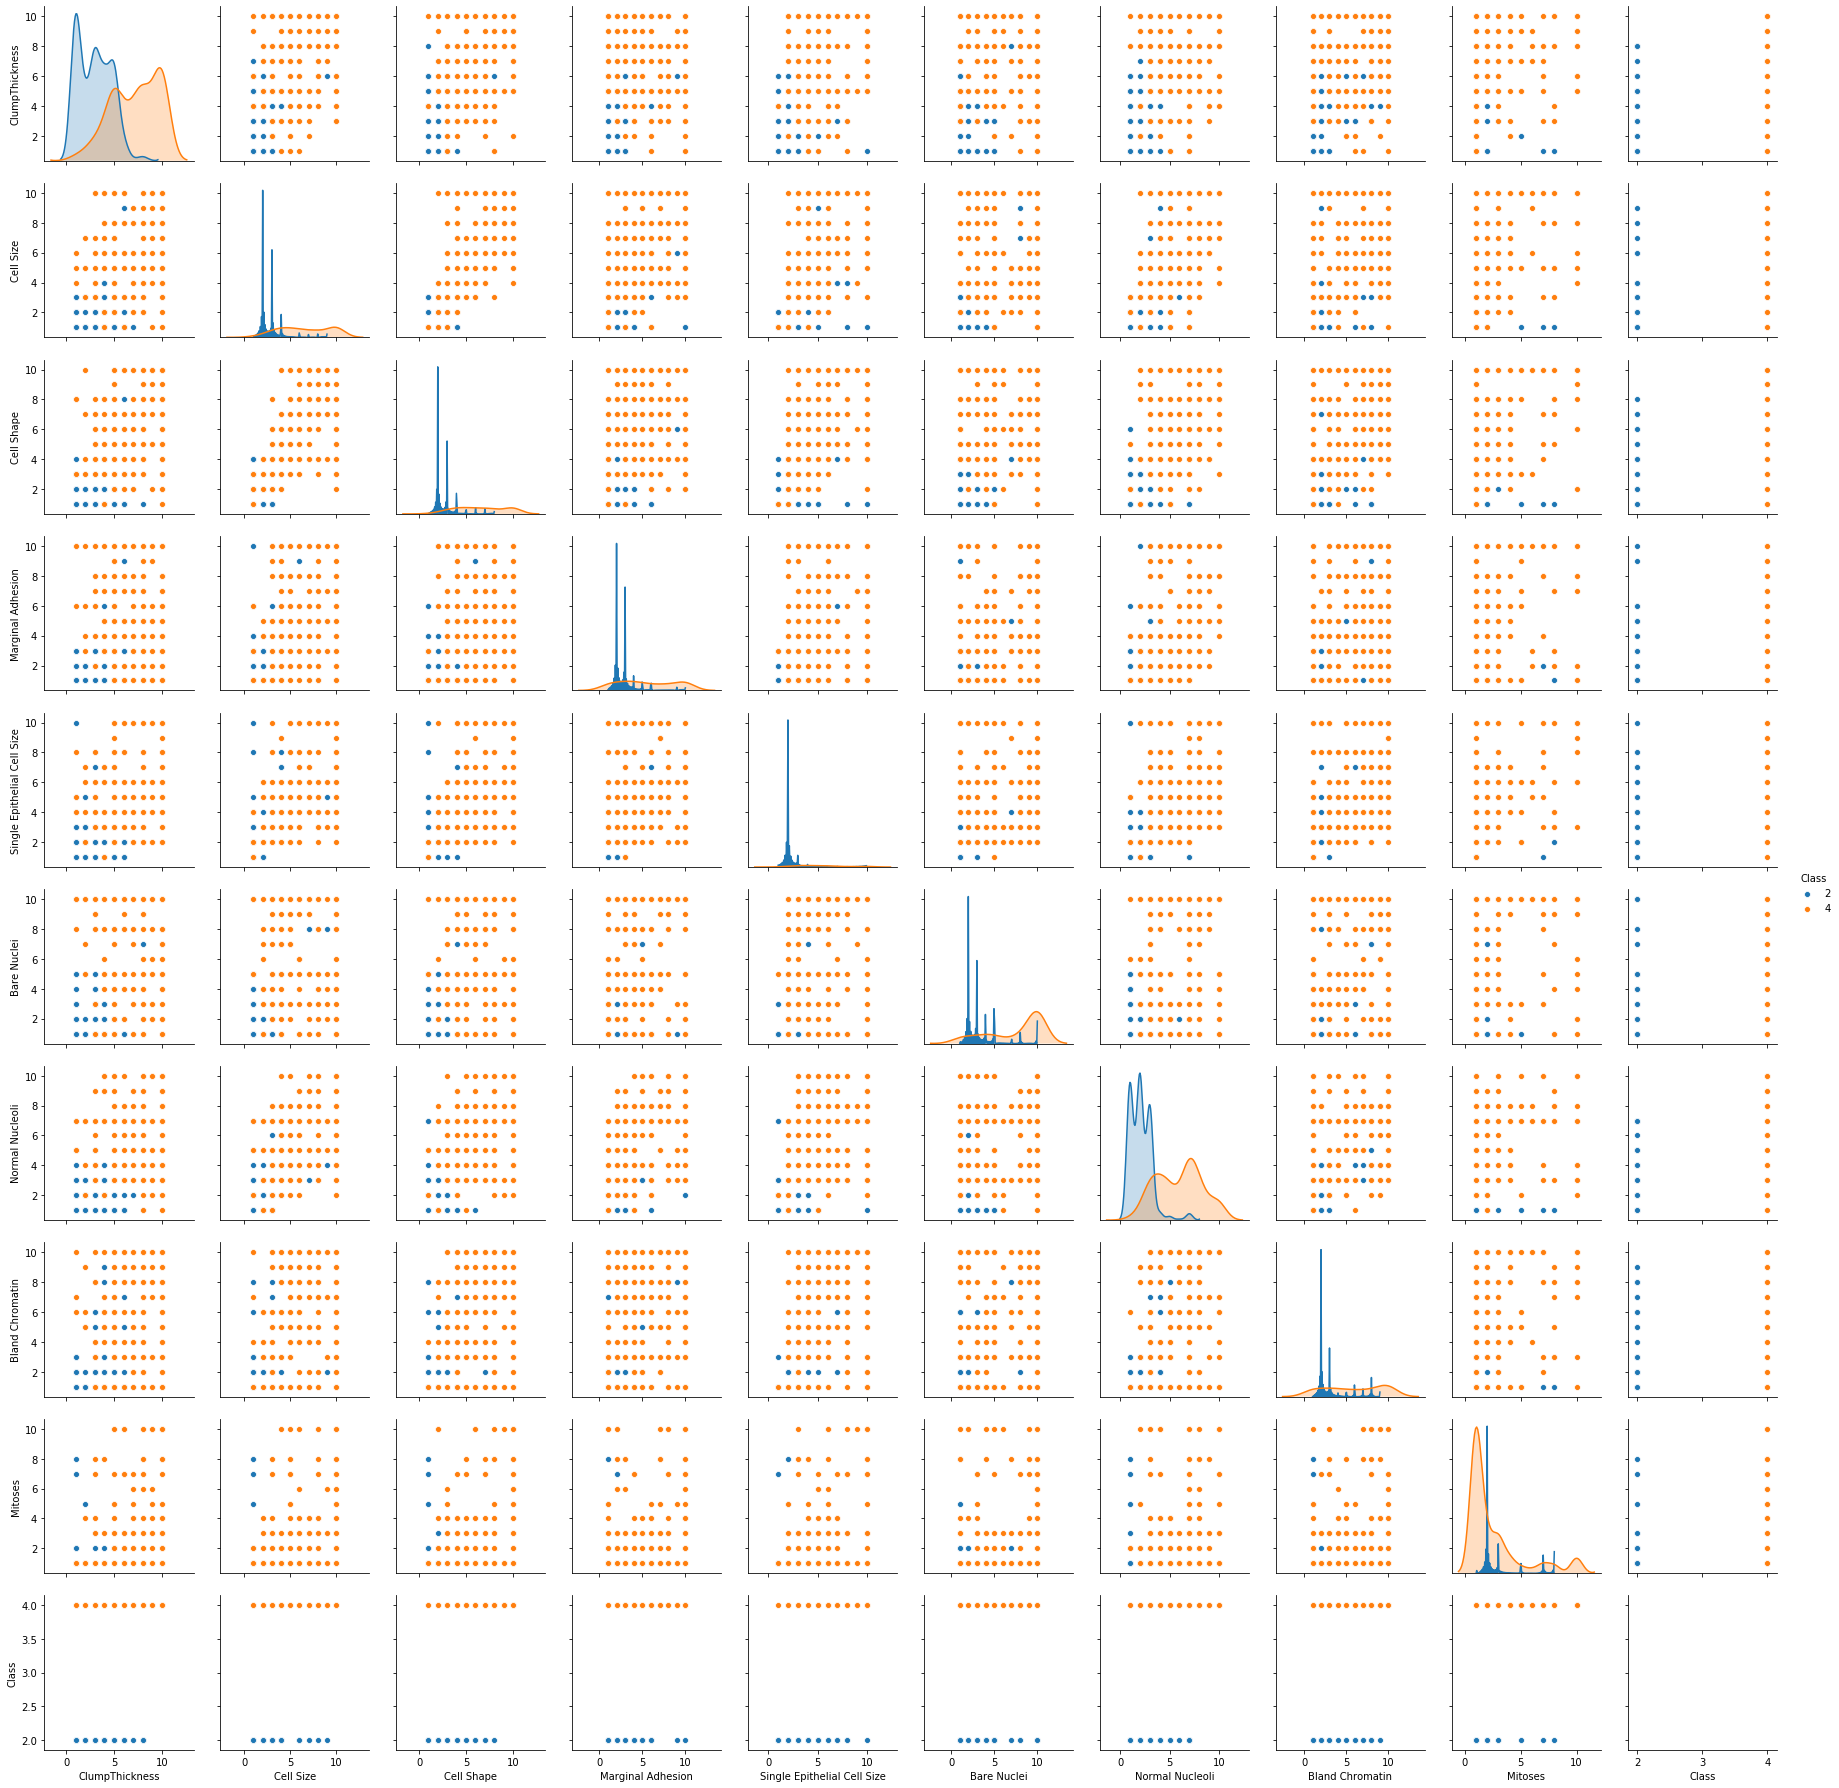

In [35]:
sns.pairplot(df, hue='Class')

In [31]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

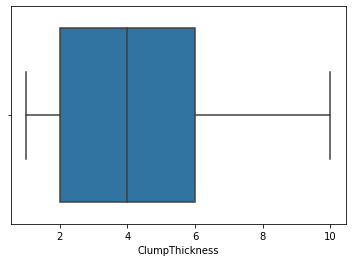

In [41]:
sns.boxplot(x=df["ClumpThickness"])

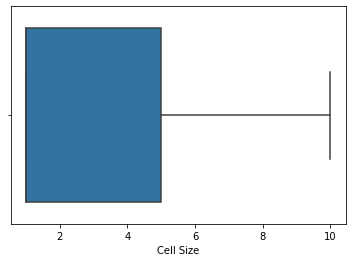

In [42]:
sns.boxplot(x=df["Cell Size"])

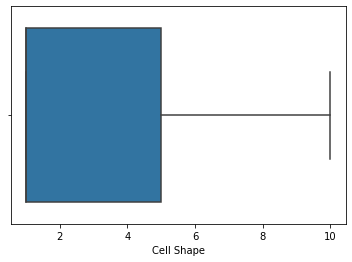

In [43]:
sns.boxplot(x=df["Cell Shape"])

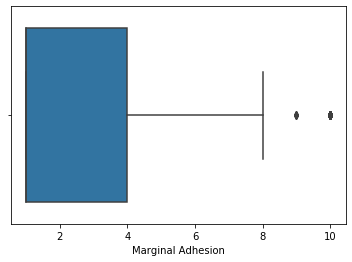

In [44]:
sns.boxplot(x=df["Marginal Adhesion"])

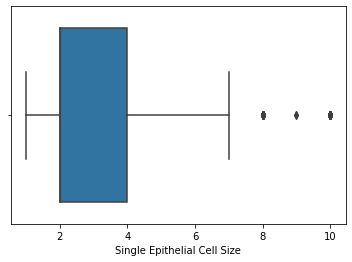

In [45]:
sns.boxplot(x=df["Single Epithelial Cell Size"])

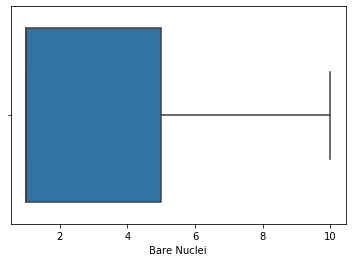

In [46]:
sns.boxplot(x=df["Bare Nuclei"])

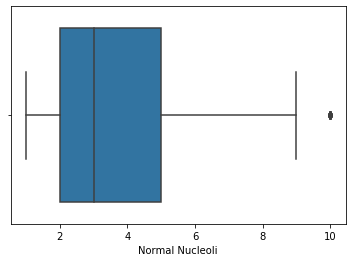

In [47]:
sns.boxplot(x=df["Normal Nucleoli"])

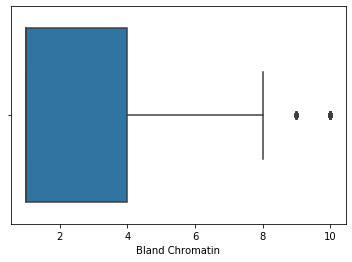

In [48]:
sns.boxplot(x=df["Bland Chromatin"])

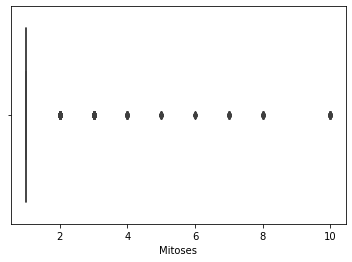

In [49]:
sns.boxplot(x=df["Mitoses"])

AxesSubplot(0.125,0.125;0.775x0.755)


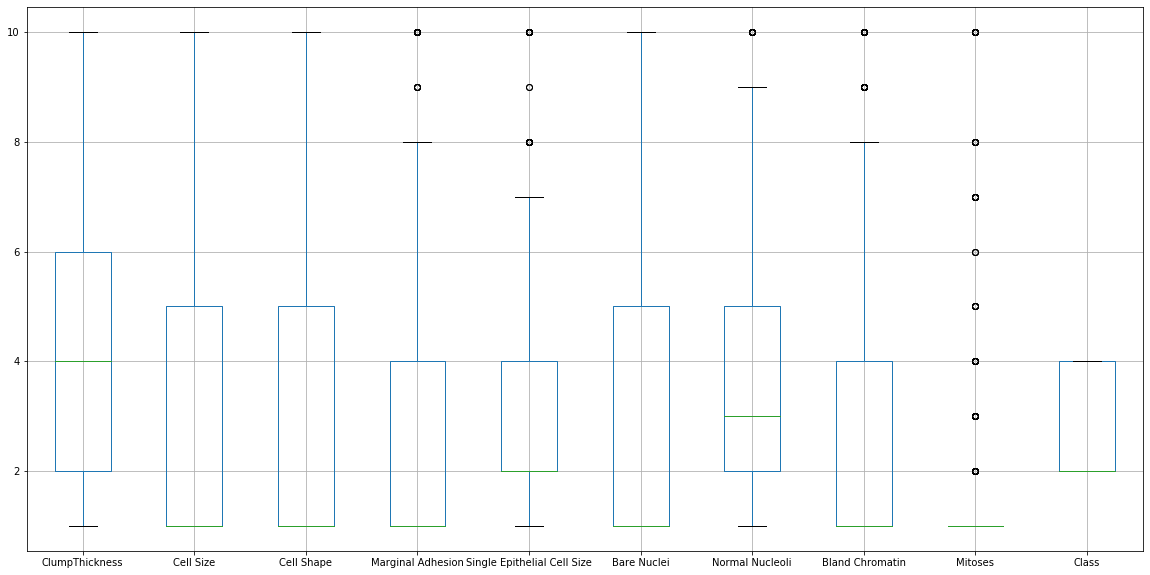

In [53]:
print(df.boxplot(figsize=(20,10)))

In [54]:
# Marginal Adhesion, Single Epi..., Bare Nuclei, Normal Nucleoli, Bland Chromation and Mitoses attributes have outliers and which has to be treated by removed or replacing with appropriate value.

In [55]:
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [56]:
pd.crosstab(df['Single Epithelial Cell Size'],df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [57]:
pd.crosstab(df['Normal Nucleoli'],df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [58]:
pd.crosstab(df['Bland Chromatin'],df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [59]:
pd.crosstab(df['Mitoses'],df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [60]:
df['Marginal Adhesion']=np.where(df['Marginal Adhesion']>4,4,df['Marginal Adhesion'])

In [61]:
df['Single Epithelial Cell Size']=np.where(df['Single Epithelial Cell Size']>4,4,df['Single Epithelial Cell Size'])

In [62]:
df['Normal Nucleoli']=np.where(df['Normal Nucleoli']>4,4,df['Normal Nucleoli'])

In [63]:
df['Bland Chromatin']=np.where(df['Bland Chromatin']>4,4,df['Bland Chromatin'])

In [64]:
df['Mitoses']=np.where(df['Mitoses']>1,2,df['Mitoses'])

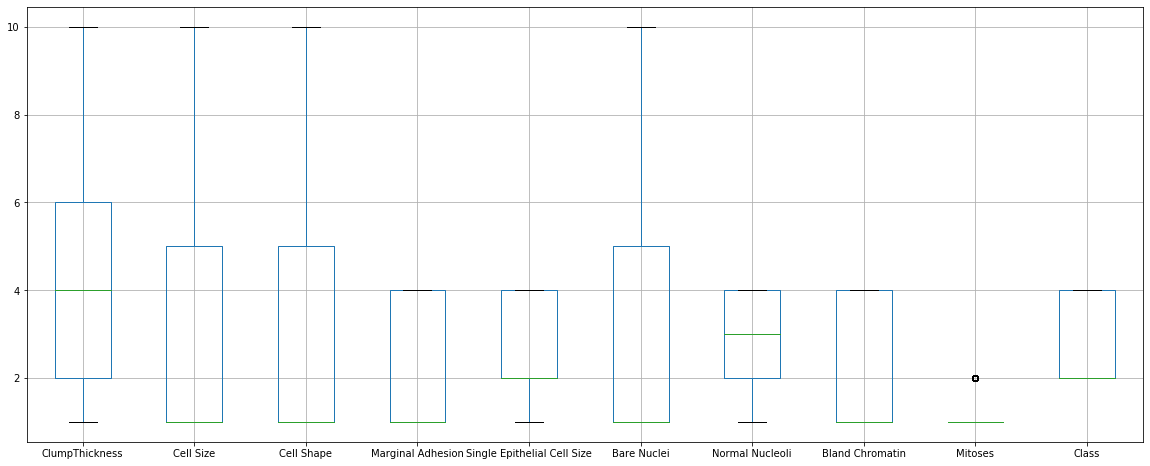

In [66]:
df.boxplot(figsize=(20,8))

In [55]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [68]:
df_PCA=df.drop('Class', axis=1)

In [69]:
# PCA
# Step 1 - Create covariance matrix.
Cov_Matrix=np.cov(df_PCA.T)
Cov_Matrix

array([[ 7.93762016,  5.51311079,  5.45212343,  2.02134999,  1.58362256,
         6.01908248,  1.74823416,  2.10597589,  0.4716266 ],
       [ 5.51311079,  9.25650701,  8.15558781,  2.84857281,  2.26463474,
         7.53352685,  2.31165941,  2.88911466,  0.56623125],
       [ 5.45212343,  8.15558781,  8.76659936,  2.70385562,  2.13964788,
         7.54129488,  2.21436865,  2.78168739,  0.51913296],
       [ 2.02134999,  2.84857281,  2.70385562,  1.68629183,  0.86946005,
         3.26875749,  0.8906628 ,  1.10828548,  0.20504407],
       [ 1.58362256,  2.26463474,  2.13964788,  0.86946005,  0.92942933,
         2.3775478 ,  0.69569424,  0.91140279,  0.16587787],
       [ 6.01908248,  7.53352685,  7.54129488,  3.26875749,  2.3775478 ,
        13.08315139,  2.63730044,  3.03232158,  0.63653057],
       [ 1.74823416,  2.31165941,  2.21436865,  0.8906628 ,  0.69569424,
         2.63730044,  1.2920658 ,  0.97184325,  0.16202225],
       [ 2.10597589,  2.88911466,  2.78168739,  1.10828548,  0

# Q7 Identify eigen values and eigen vector

In [58]:
# Step 2- Get eigen values and eigen vector

In [70]:
eigval,eigvec=np.linalg.eig(Cov_Matrix)

In [72]:
print(eigval)

[33.65662175  4.38980202  3.55940169  0.09734036  0.94355395  0.78521316
  0.27302279  0.50511406  0.59634153]


In [79]:
print(eigvec)

[[-0.37843987 -0.30647896 -0.87135491  0.0206164  -0.02743371 -0.04649941
  -0.00487784 -0.00747814  0.01322824]
 [-0.48087559 -0.37176453  0.36319043  0.03091236  0.29259529 -0.62301088
  -0.08543697 -0.0286215  -0.12575259]
 [-0.47084283 -0.31640044  0.31336008 -0.01698488 -0.62762844  0.42310295
  -0.00227839  0.03763567  0.07320909]
 [-0.17674093  0.02819162  0.05893245 -0.00735089  0.36947509  0.1629591
  -0.13724141  0.16113599  0.86981221]
 [-0.13509349 -0.0207687   0.05001891  0.01018589  0.20432108  0.10953111
   0.95516778 -0.10733471  0.03320201]
 [-0.54871597  0.8153881  -0.03876674  0.01828136 -0.10851712 -0.1176541
  -0.02434818 -0.04606233 -0.0623132 ]
 [-0.14495042  0.00846178  0.01949325 -0.03123411  0.33141354  0.31672947
  -0.02639268  0.78810015 -0.38159049]
 [-0.17619012 -0.03993526  0.05194867  0.08220666  0.46673826  0.52721125
  -0.24507634 -0.57537429 -0.26644198]
 [-0.03490771 -0.00150366 -0.00907527 -0.9950404   0.04476038  0.00382967
  -0.01179099 -0.0770956

# Q8 Find variance and cumulative variance by each eigen vector

In [88]:
Total=sum(eigval)
print(Total)

44.80641130813407


In [89]:
Eigval_sorted=sorted(eigval,reverse=True)
Eigval_sorted

[33.656621745910215,
 4.389802021604129,
 3.559401690435787,
 0.9435539463933571,
 0.7852131592144871,
 0.5963415299431879,
 0.5051140630621153,
 0.27302278833165616,
 0.09734036323913586]

In [90]:
cs=0
for x in Eigval_sorted:
    var=(x/Total)*100
    cs=var+cs

In [91]:
cs

100.00000000000001

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [94]:
from sklearn.decomposition import PCA

model = PCA()
model.fit_transform(df_PCA)
print(model.explained_variance_)

[33.65662175  4.38980202  3.55940169  0.94355395  0.78521316  0.59634153
  0.50511406  0.27302279  0.09734036]


In [96]:
print (model.explained_variance_ratio_)

[0.75115638 0.09797263 0.07943956 0.02105846 0.01752457 0.01330929
 0.01127325 0.00609339 0.00217247]


In [97]:
print (model.explained_variance_ratio_.cumsum())

[0.75115638 0.84912901 0.92856857 0.94962703 0.9671516  0.98046089
 0.99173415 0.99782753 1.        ]


# Q10 Find correlation between components and features

In [98]:
df_corr=pd.DataFrame(model.components_,df_PCA.columns)

In [99]:
df_corr.T

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.378440,0.306479,0.871355,-0.027434,0.046499,0.013228,0.007478,-0.004878,-0.020616
1,0.480876,0.371765,-0.363190,0.292595,0.623011,-0.125753,0.028622,-0.085437,-0.030912
2,0.470843,0.316400,-0.313360,-0.627628,-0.423103,0.073209,-0.037636,-0.002278,0.016985
3,0.176741,-0.028192,-0.058932,0.369475,-0.162959,0.869812,-0.161136,-0.137241,0.007351
4,0.135093,0.020769,-0.050019,0.204321,-0.109531,0.033202,0.107335,0.955168,-0.010186
5,0.548716,-0.815388,0.038767,-0.108517,0.117654,-0.062313,0.046062,-0.024348,-0.018281
6,0.144950,-0.008462,-0.019493,0.331414,-0.316729,-0.381590,-0.788100,-0.026393,0.031234
7,0.176190,0.039935,-0.051949,0.466738,-0.527211,-0.266442,0.575374,-0.245076,-0.082207
8,0.034908,0.001504,0.009075,0.044760,-0.003830,-0.022147,0.077096,-0.011791,0.995040


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [100]:
df_jokes=pd.read_csv("jokes.csv")

In [101]:
df_jokes.shape

(24983, 101)

In [102]:
print(df_jokes.dtypes)

NumJokes      int64
Joke1       float64
Joke2       float64
Joke3       float64
Joke4       float64
Joke5       float64
Joke6       float64
Joke7       float64
Joke8       float64
Joke9       float64
Joke10      float64
Joke11      float64
Joke12      float64
Joke13      float64
Joke14      float64
Joke15      float64
Joke16      float64
Joke17      float64
Joke18      float64
Joke19      float64
Joke20      float64
Joke21      float64
Joke22      float64
Joke23      float64
Joke24      float64
Joke25      float64
Joke26      float64
Joke27      float64
Joke28      float64
Joke29      float64
             ...   
Joke71      float64
Joke72      float64
Joke73      float64
Joke74      float64
Joke75      float64
Joke76      float64
Joke77      float64
Joke78      float64
Joke79      float64
Joke80      float64
Joke81      float64
Joke82      float64
Joke83      float64
Joke84      float64
Joke85      float64
Joke86      float64
Joke87      float64
Joke88      float64
Joke89      float64


In [103]:
df_jokes.isnull().sum()

NumJokes    0
Joke1       0
Joke2       0
Joke3       0
Joke4       0
Joke5       0
Joke6       0
Joke7       0
Joke8       0
Joke9       0
Joke10      0
Joke11      0
Joke12      0
Joke13      0
Joke14      0
Joke15      0
Joke16      0
Joke17      0
Joke18      0
Joke19      0
Joke20      0
Joke21      0
Joke22      0
Joke23      0
Joke24      0
Joke25      0
Joke26      0
Joke27      0
Joke28      0
Joke29      0
           ..
Joke71      0
Joke72      0
Joke73      0
Joke74      0
Joke75      0
Joke76      0
Joke77      0
Joke78      0
Joke79      0
Joke80      0
Joke81      0
Joke82      0
Joke83      0
Joke84      0
Joke85      0
Joke86      0
Joke87      0
Joke88      0
Joke89      0
Joke90      0
Joke91      0
Joke92      0
Joke93      0
Joke94      0
Joke95      0
Joke96      0
Joke97      0
Joke98      0
Joke99      0
Joke100     0
Length: 101, dtype: int64

In [104]:
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [105]:
Ratings=df_jokes.iloc[0:201,1:]

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [106]:
Ratings=Ratings.replace(99.00,0)

In [109]:
Ratings.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [110]:
ratings_diff=Ratings.mean()

In [111]:
ratings_diff.shape

(100,)

In [79]:
ratings_diff.sort_values(ascending=False).head(10)

Joke50    4.070746
Joke36    3.630498
Joke53    3.553234
Joke35    3.246468
Joke29    3.205721
Joke27    3.079254
Joke49    2.875174
Joke62    2.801741
Joke32    2.766915
Joke31    2.643383
dtype: float64

In [112]:
#Observation- Joke50 is highest rated joke.